Praktikum zu Vorlesung
[__Modellreduktion parametrisierter Systeme__](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/)

Mario Ohlberger, Felix Schindler

# Blatt 00, 03.04.2019

## Aufgabe 0

### (i) einmalige Einrichtung

Dazu müssen auf Ihrem Rechner die Befehle `python3` und `virtualenv` verfügbar sein. Das können Sie überprüfen, indem Sie ein Terminal starten (unter Ubuntu: Super/Windows Taste, terminal eingeben, Return) und die folgenden Befehle eingeben:

```bash
python3 --version
virtualenv --version
```

Beide Befehle sollten Ihnen die jeweilige Version des Programms anzeigen (und keine Fehlermeldung). Zur Einrichtung gehen Sie folgendermaßen vor:

* Ins `HOME` Verzeichnis wechseln und einen Projekt-Ordner anlegen

```bash
cd      # ins HOME Verzeichnis wechseln
pwd     # Ort des aktuellen Verzeichnises anzeigen
ls -lh  # Inhalt des aktuellen Verzeichnisses anzeigen
mkdir vorlesung_modellreduktion # ein neues Verzeichnis erstellen
cd vorlesung_modellreduktion    # in dieses Verzeichnis wechseln
pwd
ls -lh
```

* eine virtuelle Umgebung für die Programmierung mit Python schaffen

```bash
virtualenv --python=python3 python_umgebung_praktikum_modellreduktion
ls -lh
```

* die virtuelle Umgebung aktivieren

```bash
source python_umgebung_praktikum_modellreduktion/bin/activate
```

* benötigte Software in der virtuellen Umgebung installieren


```bash
pip install --upgrade pip
pip install pymor[full]
pip install notebook
du -sh python_umgebung_praktikum_modellreduktion
```
  Dabei installiert `pip install pymor[full]` das neueste Release von `pyMOR` (momentan `0.5.2`). Mehr dazu finden Sie auf https://pymor.org (gehen Sie dort auf `View on Github` und wählen anstelle von `branch: master` links oben `Tags: 0.5.2` aus, um die [entsprechende README.md](https://github.com/pymor/pymor/tree/0.5.2) anzuzeigen).

* Arbeitsverzeichnis erstellen

```bash
mkdir notebooks
```

### (ii) ab jetzt jedes mal

* ins Projektverzeichnis wechseln

```bash
cd ~/vorlesung_modellreduktion
```

* die virtuelle Umgebung aktivieren

```bash
source python_umgebung_praktikum_modellreduktion/bin/activate
```

* Notebook server starten

```bash
jupyter-notebook --notebook-dir=notebooks
```


## Aufgabe 1: Gebiete und Gitter

Aktivieren Sie die virtuelle Umgebung zum Praktikum und starten Sie den Notebook server (falls noch nicht geschehen)

1. Erstellen Sie ein neues `Python 3` notebook und benennen Sie es in `grid_interpolations` um.

2. Geben Sie folgende Befehle in die erste Zelle ein und führen Sie sie aus (mit `STRG` + `Return`):

   ```python
%matplotlib notebook
import numpy as np
from pymor.basic import *
```

   Ab jetzt ist die [numpy](https://docs.scipy.org/doc/) Bibliothek unter `np` verfügbar und _alles aus `pymor.basic`_ direkt verfügbar.

In [1]:
%matplotlib notebook
import numpy as np
from pymor.basic import *

3. Suchen Sie in der [pyMOR Dokumentation auf docs.pymor.org/](http://docs.pymor.org/en/0.5.1/) nach einer Klasse, die das Gebiet $$\Omega = [0, 1]^2$$ modellieren kann und legen Sie ein entsprechendes Objekt mit Namen `omega` an. Nutzen Sie dazu auch die Möglichkeit des jupyter Notebooks, sich zu einem beliebigen Objekt mit Hilfe des `?`-postfix die Dokumentation anzeigen zu lassen (z.B. `np.array?`).

In [2]:
# => API Dokumentation http://docs.pymor.org/en/0.5.1/index.html#api-documentation
# => Modul "domaindescriptions": http://docs.pymor.org/en/0.5.1/generated/pymor.domaindescriptions.html
# => Klasse RectDomain, diese ist Dank des * imports direkt verfügbar
# => Hilfe zu RectDomain anzeigen lassen: RectDomain?

omega = RectDomain(([0, 0], [1, 1]))

4. Suchen Sie nach einer Möglichkeit ein konformes Dreiecksgitter $\mathcal{T}_h$ als Partitionierung des Gebiets $\Omega$ mit 16 Dreiecken zu erstellen, und geben Sie folgende Informationen aus:
  - Dimension `d` des Gitters
  - Anzahl der Elemente (Kodimension 0 Entitäten, in diesem Fall Dreiecke) im Gitter
  - Anzahl der Kanten (Kodimension 1 Entitäten, in diesem Fall Intervalle) im Gitter
  - Anzahl der Knoten (Kodimension `d` Entitäten, Punkte) im Gitter
  - die Position eines jeden Knoten des Gitters mit Hilfe einer `for`-Schleife

   Vergleichen Sie die Positionen der Knoten mit der Dokumentation.

In [3]:
# => API Dokumentation, Modul grid, Klasse TriaGrid
# => Hilfe anzeigen lassen: TriaGrid?

grid = TriaGrid(num_intervals=(2, 2), domain=omega.domain)
print(grid)
print()
print('grid lives in a {}-dimensional space'.format(grid.dim))
print('grid has {} simplices'.format(grid.size(0)))
print('grid has {} edges'.format(grid.size(1)))
print('grid has {} vertices'.format(grid.size(2)))

vertices = grid.centers(grid.dim)
print()
print(type(vertices))
print(vertices.shape)

print()
print('vertices:')
counter = 0
for vertex in vertices:
    print('vertex {} has position {}'.format(counter, vertex))
    counter += 1

Tria-Grid on domain [0,1] x [0,1]
x0-intervals: 2, x1-intervals: 2
elements: 16, edges: 28, vertices: 13

grid lives in a 2-dimensional space
grid has 16 simplices
grid has 28 edges
grid has 13 vertices

<class 'numpy.ndarray'>
(13, 2)

vertices:
vertex 0 has position [5.55111512e-17 5.55111512e-17]
vertex 1 has position [5.00000000e-01 5.55111512e-17]
vertex 2 has position [1.00000000e+00 5.55111512e-17]
vertex 3 has position [5.55111512e-17 5.00000000e-01]
vertex 4 has position [0.5 0.5]
vertex 5 has position [1.  0.5]
vertex 6 has position [5.55111512e-17 1.00000000e+00]
vertex 7 has position [0.5 1. ]
vertex 8 has position [1. 1.]
vertex 9 has position [0.25 0.25]
vertex 10 has position [0.75 0.25]
vertex 11 has position [0.25 0.75]
vertex 12 has position [0.75 0.75]


5. Visualisieren Sie "das Gitter", indem Sie die Funktion

   $$v_h \in V_h^0,\quad\quad v_h|_K := \text{index of } K \text{ in the grid},\quad\forall K \in \mathcal{T}_h$$

   visualisieren, wobei
   
   $$V_h^0 := \big\{ v \in L^2(\Omega) \;\big|\; v|_K \in \mathbb{P}_0(K)\quad\forall K \in \mathcal{T}_h\big\}$$
   
   den Raum der stückweise konstanten Funktionen bzgl. des Gitters bezeichnet ($\mathbb{P}_p(\omega)$ ist dabei der Raum der Polynome vom Grad kleiner gleich $p \in \mathbb{N}$ über einem Gebiet $\omega \subset \mathbb{R}^d$). Der Raum $V_h^0$ spielt insbesondere bei _Finite Volumen_ Verfahren eine Rolle.
   - Definieren Sie dazu $V_h^0$ mit Hilfe des `NumpyVectorSpace` und legen Sie ein entsprechendes Objekt `fv_space` an.
   - Erstellen Sie mit Hilfe von numpy den zu $v_h$ assoziierten DoF-Vektor mit den Werten $0, \dots, 15$
   - Erstellen Sie $v_h$ aus diesem DoF-Vektor mit Hilfe von `fv_space.from_data`.
   - Was ist $v_h$?
   - Erstellen Sie einen `fv_visualizer` vom Typ [PatchVisualizer](http://docs.pymor.org/en/0.5.1/generated/pymor.gui.html#pymor.gui.visualizers.PatchVisualizer), achten Sie auf die korrekte Kodimension! Importieren Sie dazu das nötige Modul (nicht Teil von `pymor.basic`, also noch nicht verfügbar).
   - Nutzen Sie die `visualize` Methode, geben Sie mit `legend=` einen Titel an, setzen Sie bei Bedarf `d=None`.

NumpyVectorSpace(16, FV)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

<class 'pymor.vectorarrays.numpy.NumpyVectorArray'>
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]]
1
16


<IPython.core.display.Javascript object>


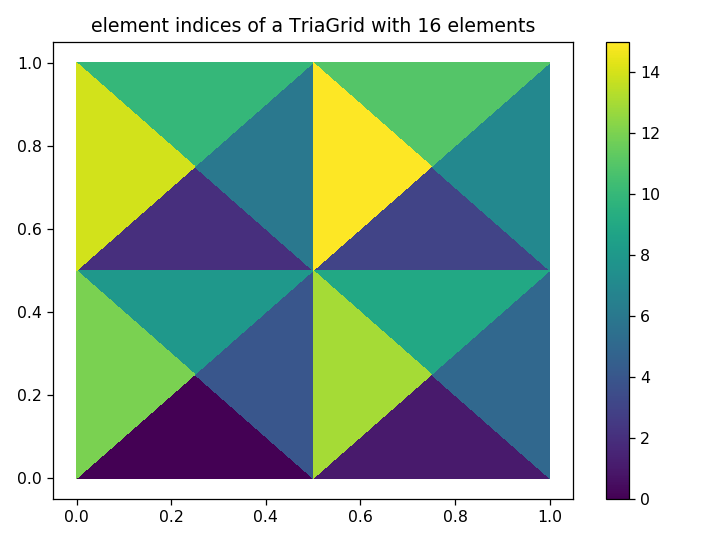

In [4]:
fv_space = NumpyVectorSpace(dim=grid.size(0), id_='FV')

print(fv_space)

v_h = np.arange(15)
print()
print(v_h)

v_h = fv_space.from_data(np.arange(fv_space.dim))
print()
print(type(v_h))
print(v_h)
print(len(v_h))
print(v_h.dim)

# => v_h ist ein NumpyVectorArray (http://docs.pymor.org/en/0.5.1/generated/pymor.vectorarrays.html#module-pymor.vectorarrays.numpy),
#    also insbesondere vom Typ VectorArrayInterface (http://docs.pymor.org/en/0.5.1/generated/pymor.vectorarrays.html#pymor.vectorarrays.interfaces.VectorArrayInterface)
# siehe auch http://docs.pymor.org/en/0.5.1/technical_overview.html#three-central-classes

from pymor.gui.visualizers import PatchVisualizer
fv_visualizer = PatchVisualizer(grid, bounding_box=grid.bounding_box, codim=0)
fv_visualizer.visualize(v_h, d=None, legend='element indices of a TriaGrid with {} elements'.format(grid.size(0)))

### Aufgabe 2: analytische Funktionen vektorisiert implementieren

Sei $f: \Omega \to \mathbb{R}$ gegeben durch $f(x_0, x_1) := x_0 \cdot x_1$.

1. Schreiben Sie eine Funktion `f`, die die Auswertung von $f$ and einem Punkt $x$ modelliert und werten Sie die Funktion `f` für jeden Knotenpunkt des Gitters einzeln mit Hilfe einer `for`-Schleife aus.

In [5]:
def f(x):
    return x[0]*x[1]

for x in vertices:
    print('f({}) = {}'.format(x, f(x)))

f([5.55111512e-17 5.55111512e-17]) = 3.0814879110195774e-33
f([5.00000000e-01 5.55111512e-17]) = 2.775557561562891e-17
f([1.00000000e+00 5.55111512e-17]) = 5.551115123125783e-17
f([5.55111512e-17 5.00000000e-01]) = 2.775557561562891e-17
f([0.5 0.5]) = 0.24999999999999994
f([1.  0.5]) = 0.49999999999999994
f([5.55111512e-17 1.00000000e+00]) = 5.551115123125783e-17
f([0.5 1. ]) = 0.4999999999999999
f([1. 1.]) = 0.9999999999999999
f([0.25 0.25]) = 0.0625
f([0.75 0.25]) = 0.1875
f([0.25 0.75]) = 0.1875
f([0.75 0.75]) = 0.5625


2. Erstellen Sie ein feineres Gitter mit $1024^2$ Intervallen und messen Sie die benötigte Zeit, um `f` an jedem Knotenpunkt des feineren Gitters auszuwerten.

In [6]:
fine_grid = TriaGrid(num_intervals=(1024, 1024), domain=omega.domain)
print(fine_grid)

import time
tic = time.time()
values = f(fine_grid.centers(grid.dim))
toc = time.time() - tic
print()
print('evaluating non-vectorized function took {}s'.format(toc))

Tria-Grid on domain [0,1] x [0,1]
x0-intervals: 1024, x1-intervals: 1024
elements: 4194304, edges: 6293504, vertices: 2099201

evaluating non-vectorized function took 14.819856882095337s


3. Versuchen Sie, `f` an allen Knotenpunkten des groben Gitters gleichzeitig auszuwerten. Warum funktioniert das nicht?

In [7]:
# => an allen Punkten gleichzeitig auswerten
values = f(vertices)
print(values)
print(len(vertices))
print(len(values))

[2.77555756e-17 3.08148791e-33]
13
2


In [8]:
# Warum kommt das raus?
# Beim Aufruf f(vertices) passiert
vertices[0]*vertices[1]
# also eine elementweise Multiplikation des 0ten und 1ten Knotens

array([2.77555756e-17, 3.08148791e-33])

4. Schreiben Sie eine vektorisierte Variante von `f`, welche die elementweisen Operationen des `numpy.ndarray` ausnutzt.
* Werten Sie diese Variante für alle Knotenpunkte des feineren Gitters gleichzeitig aus und messen Sie die benötigte Zeit.

In [9]:
# Gegeben eine Menge von Punkten als Matrix
print(vertices)
print(vertices.shape)

# extrahiere 0te und 1te Komponente für alle Punkte gleichzeitig
x_0s = vertices[..., 0] # 0te Spalte
x_1s = vertices[..., 1] # 1te Spalte
print()
print(type(x_0s))
print(x_0s)
print(x_1s)

[[5.55111512e-17 5.55111512e-17]
 [5.00000000e-01 5.55111512e-17]
 [1.00000000e+00 5.55111512e-17]
 [5.55111512e-17 5.00000000e-01]
 [5.00000000e-01 5.00000000e-01]
 [1.00000000e+00 5.00000000e-01]
 [5.55111512e-17 1.00000000e+00]
 [5.00000000e-01 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00]
 [2.50000000e-01 2.50000000e-01]
 [7.50000000e-01 2.50000000e-01]
 [2.50000000e-01 7.50000000e-01]
 [7.50000000e-01 7.50000000e-01]]
(13, 2)

<class 'numpy.ndarray'>
[5.55111512e-17 5.00000000e-01 1.00000000e+00 5.55111512e-17
 5.00000000e-01 1.00000000e+00 5.55111512e-17 5.00000000e-01
 1.00000000e+00 2.50000000e-01 7.50000000e-01 2.50000000e-01
 7.50000000e-01]
[5.55111512e-17 5.55111512e-17 5.55111512e-17 5.00000000e-01
 5.00000000e-01 5.00000000e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.50000000e-01 2.50000000e-01 7.50000000e-01
 7.50000000e-01]


In [10]:
# Das ganze kompakt in einer Funktion
def f(x):
    return x[..., 0]*x[..., 1]

# Kann an einem Punkt ausgewertet werden ...
print(f(vertices[0]))
# ... oder an allen Punkten gleichzeitig
print(f(vertices))

3.0814879110195774e-33
[3.08148791e-33 2.77555756e-17 5.55111512e-17 2.77555756e-17
 2.50000000e-01 5.00000000e-01 5.55111512e-17 5.00000000e-01
 1.00000000e+00 6.25000000e-02 1.87500000e-01 1.87500000e-01
 5.62500000e-01]


In [11]:
tic = time.time()
values = f(fine_grid.centers(grid.dim))
toc = time.time() - tic
print('took {}s'.format(toc))

took 0.015718698501586914s


6. Erstellen Sie eine `ExpressionFunction`, um $f$ zu modellieren, werten Sie diese an allen Knotenpunkten des feinen Gitters aus und messen Sie die benötigte Zeit.

In [12]:
f = ExpressionFunction('x[..., 0]*x[..., 1]', dim_domain=2, shape_range=())
tic = time.time()
values = f.evaluate(fine_grid.centers(grid.dim))
toc = time.time() - tic
print('took {}s'.format(toc))

took 0.01346278190612793s
